# Project ID - #CC69853 
Project Title - Customer Segmentation with K-Means Clustering 
Internship Domain - Data Science Intern
Project Level - Entry Level
Assigned By- CodeClause Internship 
Assigned To-   Ashutosh Kumar 

# Import Libraries :-

In [42]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from catboost import CatBoostClassifier ,Pool
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

ModuleNotFoundError: No module named 'catboost'

# Reading Data :- 

In [2]:
data = pd.read_csv("Customers.csv")

# EDA :- 

In [4]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
cols=data.columns
for col in cols:
    print(data[col].value_counts(),"\n")

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64 

Female    112
Male       88
Name: Gender, dtype: int64 

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64 

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64 

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64 



# EDA With Visualization :-

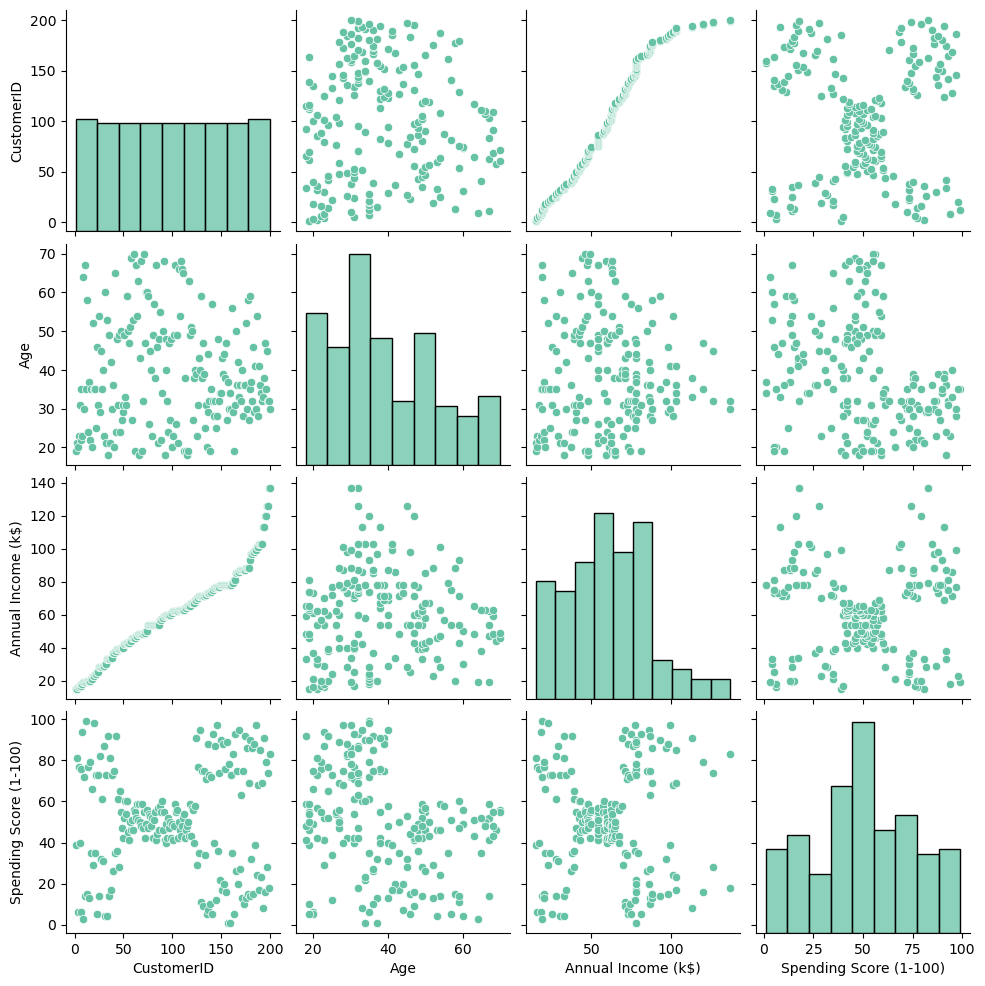

In [9]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
sns.pairplot(data)

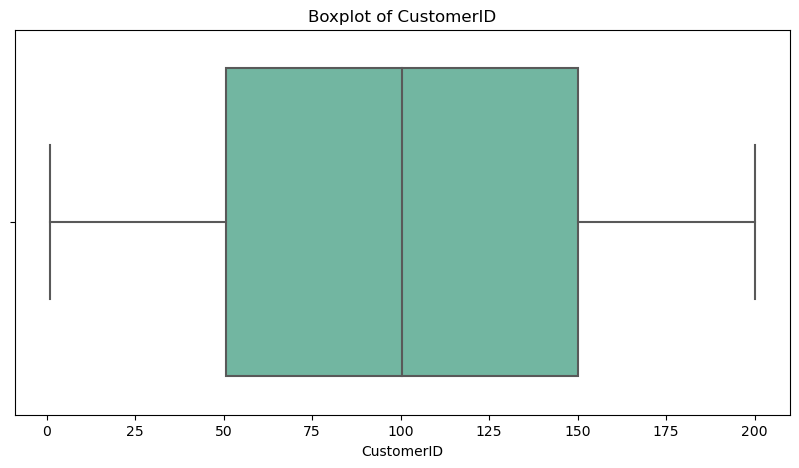

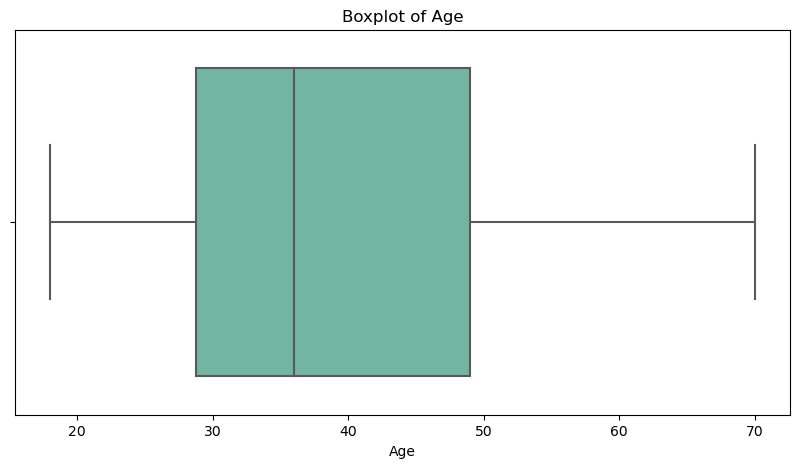

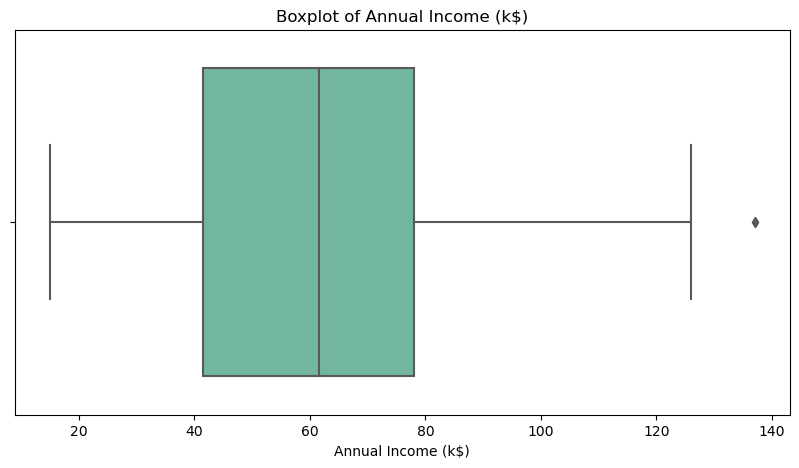

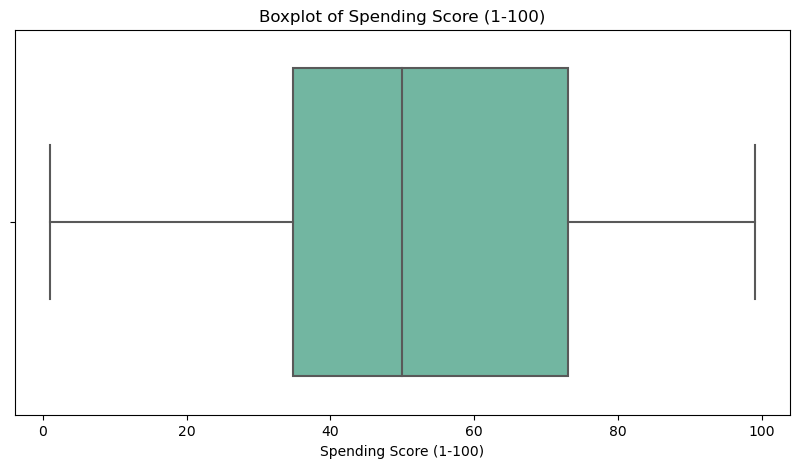

In [10]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f'Boxplot of {col}')
    bp = sns.boxplot(data=data, x=col, ax=ax)
    plt.show()
    plt.close(fig)


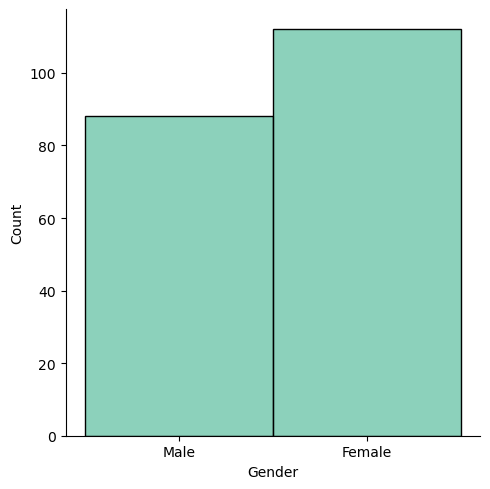

In [11]:
custom_palette = "Set2"  
sns.set_palette(custom_palette)
sns.displot(data=data, x="Gender")

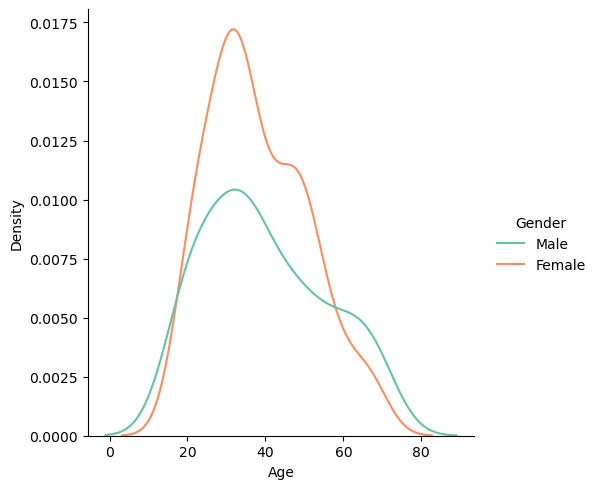

In [12]:
sns.displot(data, x = 'Age',hue='Gender', kind='kde')

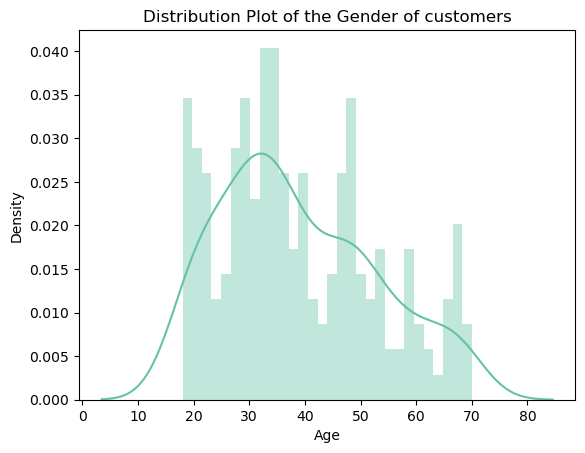

In [13]:
sns.set_palette("Set2")  
sns.distplot(data['Age'], kde=True, bins=30)
plt.title('Distribution Plot of the Gender of customers')
plt.show()

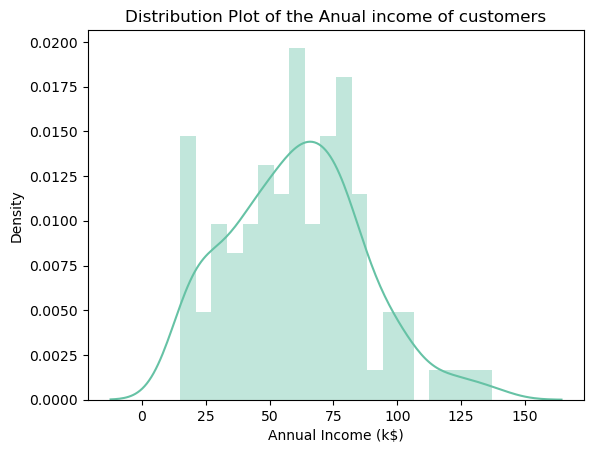

In [14]:
sns.set_palette("Set2")  
sns.distplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution Plot of the Anual income of customers')
plt.show()

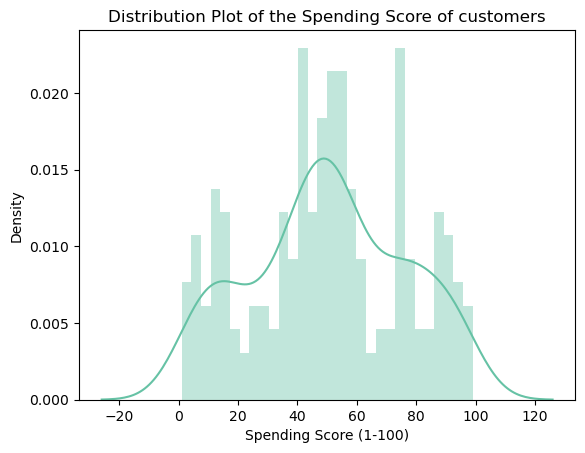

In [15]:
sns.set_palette("Set2")  
sns.distplot(data["Spending Score (1-100)"], kde=True, bins=30)
plt.title('Distribution Plot of the Spending Score of customers')
plt.show()

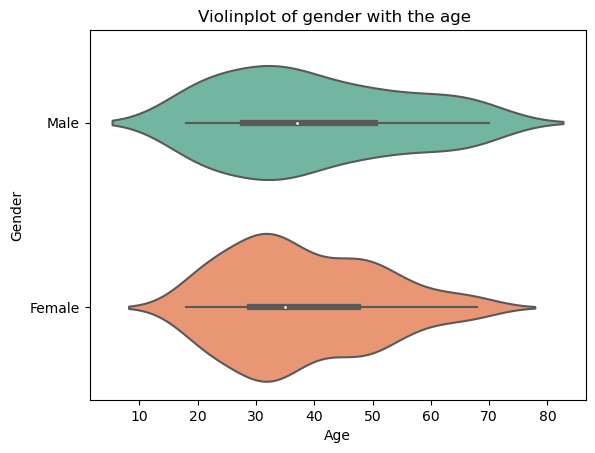

In [16]:
custom_palette = "Set2"
sns.violinplot(x='Age', y='Gender', data=data, palette=custom_palette)
plt.title('Violinplot of gender with the age ')
plt.show()

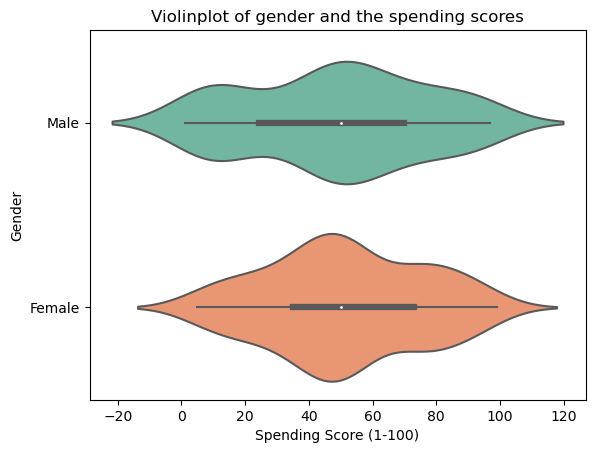

In [17]:
custom_palette = "Set2"
sns.violinplot(x="Spending Score (1-100)", y='Gender', data=data, palette=custom_palette)
plt.title('Violinplot of gender and the spending scores')
plt.show()

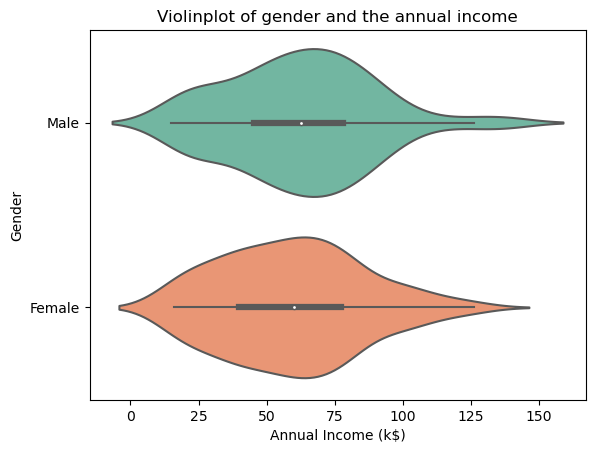

In [18]:
custom_palette = "Set2"
sns.violinplot(x="Annual Income (k$)", y='Gender', data=data, palette=custom_palette)
plt.title('Violinplot of gender and the annual income')
plt.show()

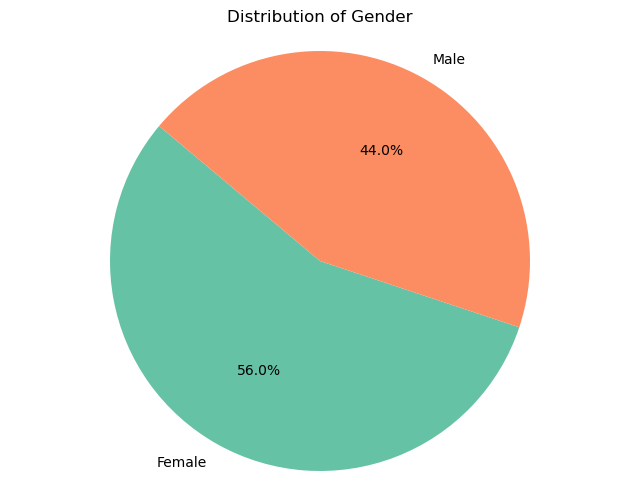

In [19]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette()
                                   , startangle=140)
plt.title("Distribution of Gender")
plt.ylabel("")
plt.axis('equal')
plt.show()

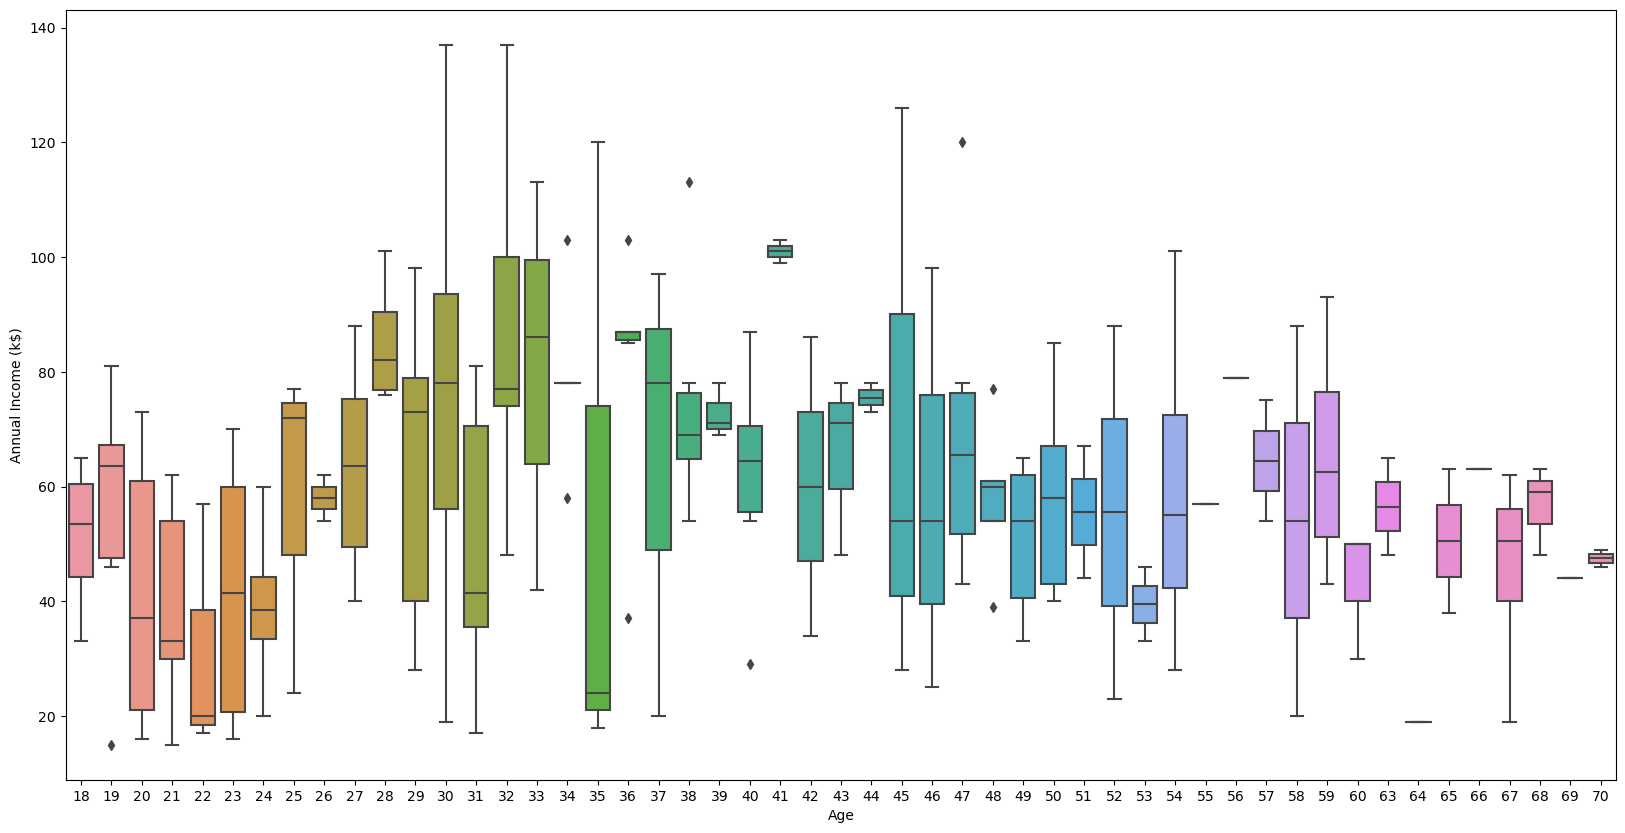

In [20]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="Age", y="Annual Income (k$)")
plt.show()

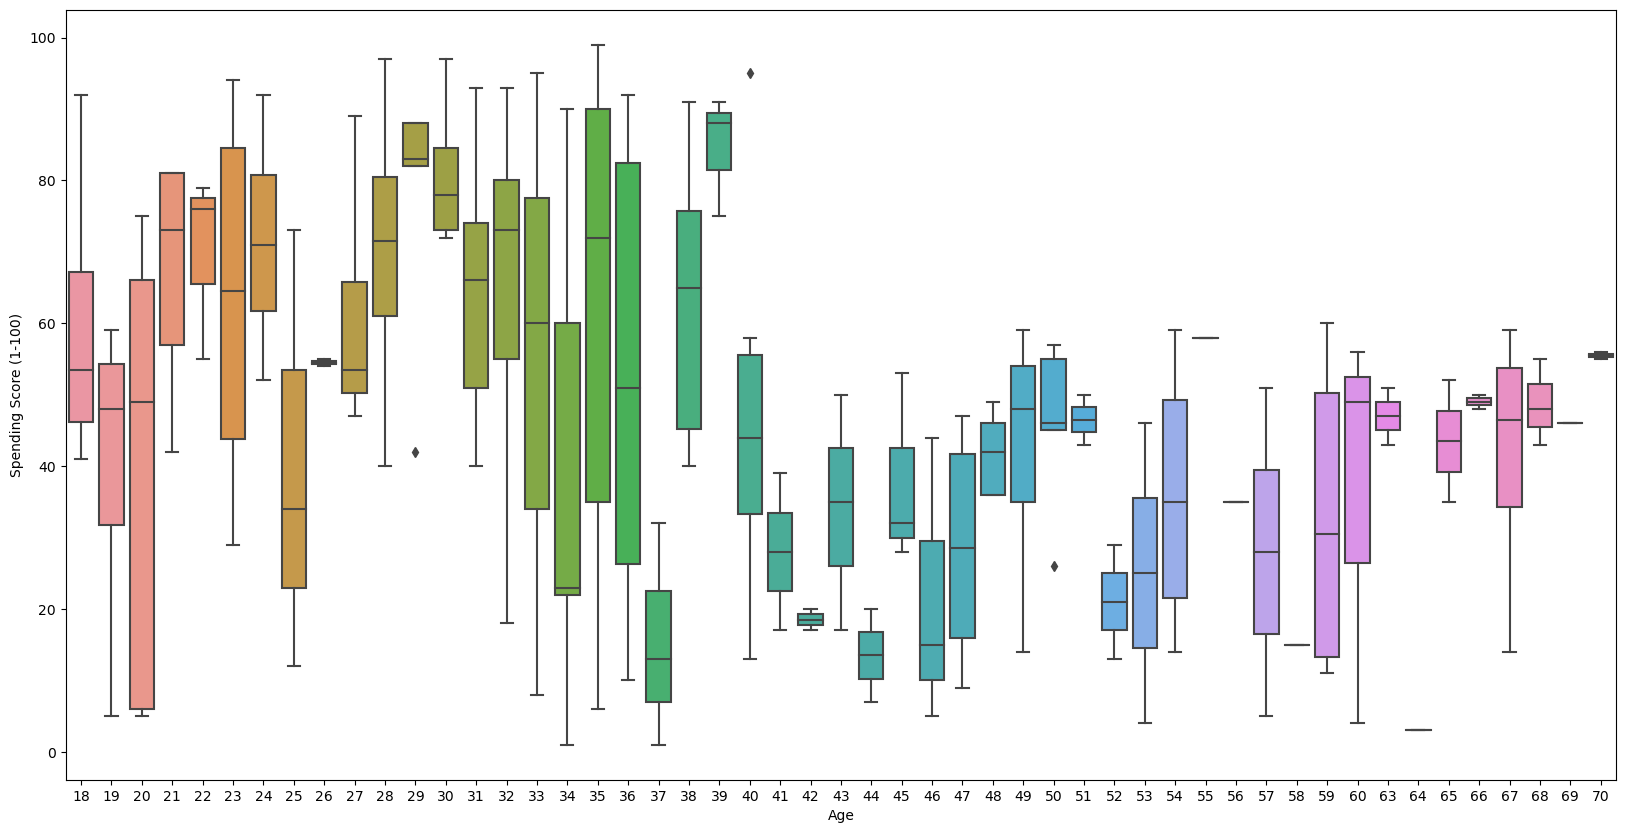

In [21]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="Age", y="Spending Score (1-100)")
plt.show()

# Pre-Processing Operations :-

In [22]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
# Dropping the customer id columns because it will be not useful and maybe has effects on the models 
data.drop(columns=["CustomerID"],inplace=True)

In [25]:
Features=data.drop(columns=["Gender"])
Goal=data["Gender"]

In [26]:
Features.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [27]:
Goal.head(10)

0      Male
1      Male
2    Female
3    Female
4    Female
5    Female
6    Female
7    Female
8      Male
9    Female
Name: Gender, dtype: object

In [28]:
Scaled_Features = MaxAbsScaler().fit_transform(Features)
Scaled_Features = pd.DataFrame(Scaled_Features, columns=Features.columns)

In [29]:
Scaled_Features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.271429,0.109489,0.393939
1,0.300000,0.109489,0.818182
2,0.285714,0.116788,0.060606
3,0.328571,0.116788,0.777778
4,0.442857,0.124088,0.404040


In [30]:
# Saving Scaled Features as CSV File
Scaled_Features.to_csv('Scaled Features.csv', index=False)

In [31]:
Ftrain,Ftest,Gtrain,Gtest=train_test_split(Scaled_Features,Goal,test_size=0.1,random_state=0)

In [32]:
Ftrain.head()

,Age,Annual Income (k$),Spending Score (1-100)
183,0.414286,0.715328,0.888889
145,0.400000,0.562044,0.979798
45,0.342857,0.284672,0.656566
159,0.428571,0.569343,0.737374
60,1.000000,0.335766,0.565657


In [33]:
Ftest.head()

,Age,Annual Income (k$),Spending Score (1-100)
18,0.742857,0.167883,0.292929
170,0.571429,0.635036,0.131313
107,0.771429,0.459854,0.464646
98,0.685714,0.445255,0.424242
177,0.385714,0.642336,0.696970


In [34]:
Gtrain.head()

183    Female
145      Male
45     Female
159    Female
60       Male
Name: Gender, dtype: object

In [35]:
Gtest.head()

18     Male
170    Male
107    Male
98     Male
177    Male
Name: Gender, dtype: object

# Applying Grid Search Model on Decision Tree Classifier :-

In [39]:
DTC = DecisionTreeClassifier()

DTC_Params = {
    'max_depth' : [3,5,7,9,10,11,12],
    'min_samples_leaf' :list(range(2,20)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split' : list(range(2,20))
}

GRS = GridSearchCV(DTC, DTC_Params, cv = 7)
GRS.fit(Ftrain, Gtrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.6160439560439561


In [43]:
DTC=DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 2, min_samples_split= 5)
DTC.fit(Ftrain,Gtrain)
DTC_Pred=DTC.predict(Ftest)
DTC_Pred_Train=DTC.predict(Ftrain)

In [46]:
from sklearn.metrics import accuracy_score

# Now you can use accuracy_score function
test_accuracy = accuracy_score(Gtest, DTC_Pred)
print(f"Accuracy Score for the test group: {test_accuracy*100}\n")
train_accuracy = accuracy_score(Gtrain, DTC_Pred_Train)


Accuracy Score for the test group: 45.0



In [48]:
from sklearn.metrics import classification_report

# Now you can use classification_report function
print("Classification Report for the test group : \n")
print(classification_report(Gtest, DTC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain, DTC_Pred_Train),"\n\n")


Classification Report for the test group : 

              precision    recall  f1-score   support

      Female       0.40      0.75      0.52         8
        Male       0.60      0.25      0.35        12

    accuracy                           0.45        20
   macro avg       0.50      0.50      0.44        20
weighted avg       0.52      0.45      0.42        20
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

      Female       0.77      0.96      0.85       104
        Male       0.92      0.61      0.73        76

    accuracy                           0.81       180
   macro avg       0.84      0.78      0.79       180
weighted avg       0.83      0.81      0.80       180
 




[[6 2]
 [9 3]]


<Axes: >

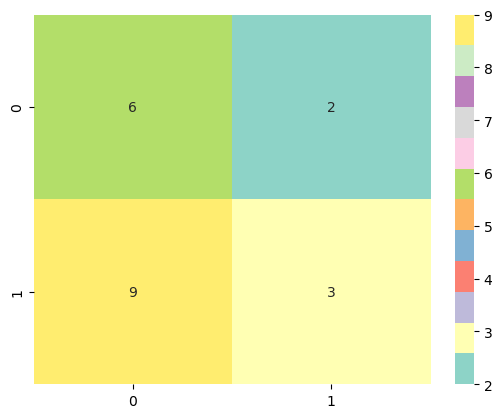

In [50]:
from sklearn.metrics import confusion_matrix

# Now you can use confusion_matrix function
CM_DTC = confusion_matrix(Gtest, DTC_Pred)
print(CM_DTC)
sns.heatmap(CM_DTC, annot=True, cmap="Set3")
